<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/01_Binary_Classification_of_Machine_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

## Synthetically-Generated Datasets
Using synthetic data for Playground competitions allows us to strike a balance between having real-world data (with named features) and ensuring test labels are not publicly available. This allows us to host competitions with more interesting datasets than in the past. While there are still challenges with synthetic data generation, the state-of-the-art is much better now than when we started the Tabular Playground Series two years ago, and that goal is to produce datasets that have far fewer artifacts. Please feel free to give us feedback on the datasets for the different competitions so that we can continue to improve!

## Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

##Features
 - Product ID: This represents a unique identifier for each product or item in the dataset. It's a categorical feature used for identification purposes.

 - Type: Another categorical feature denoting the type or category of the product. It could signify different product variations, models, or categories.

 - Air temperature [K]: The temperature of the air surrounding the machine or the product, measured in Kelvin (K). It indicates the thermal conditions during the process.

 - Process temperature [K]: The temperature specifically within the manufacturing or processing environment, also measured in Kelvin (K). This feature relates to the temperature within the machinery during the manufacturing process.

 - Rotational speed [rpm]: The speed at which the machinery or product rotates, measured in revolutions per minute (rpm). It signifies the rotational dynamics during the manufacturing process.

 - Torque [Nm]: The amount of rotational force applied, measured in Newton-meters (Nm). It indicates the extent of force applied to rotate the machinery or product.

 - Tool wear [min]: The cumulative duration or time period for which the manufacturing tool has been in use or undergone wear and tear, measured in minutes (min).

 - Machine failure: This is the target variable, indicating whether a machine failure occurred or not. It's a binary feature (0 or 1), denoting the occurrence (1) or absence (0) of machine failure.

 - TWF (Tool Wear Failure): A categorical feature denoting the occurrence of tool wear failure, possibly binary (0 or 1), indicating if a failure happened due to tool wear.

 - HDF (Heat Dissipation Failure): Similar to TWF, this categorical feature denotes the occurrence of failure due to heat dissipation issues.

 - PWF (Power Failure): Categorical feature indicating instances of power failures during the process.

 - OSF (Outlier Sensor Failure): Denotes failures resulting from outlier sensor data or sensor malfunction.

 - RNF (Roughness Failure): Represents failures caused by surface roughness issues or irregularities.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from  sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,f1_score,balanced_accuracy_score

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Co2Emission/train.csv').drop(['id','Product ID'],axis=1)

In [ ]:
df.shape

(136429, 12)

In [ ]:
df.sample(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
62166,M,301.0,310.7,1567,38.5,108,0,0,0,0,0,0
25542,L,299.5,310.7,1514,52.1,110,0,0,0,0,0,0
104457,L,300.6,309.8,1359,60.1,121,1,0,0,1,0,0
21379,L,298.4,309.4,1385,45.9,121,0,0,0,0,0,0
91562,M,300.0,309.7,1422,42.6,112,0,0,0,0,0,0


In [ ]:
datatypes = {'Type':'category','Machine failure':'int8','TWF':'int8','HDF':'int8','PWF':'int8','OSF':'int8','RNF':'int8'}
df = df.astype(datatypes)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0
OSF,136429.0,0.003958,0.062789,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<Axes: >

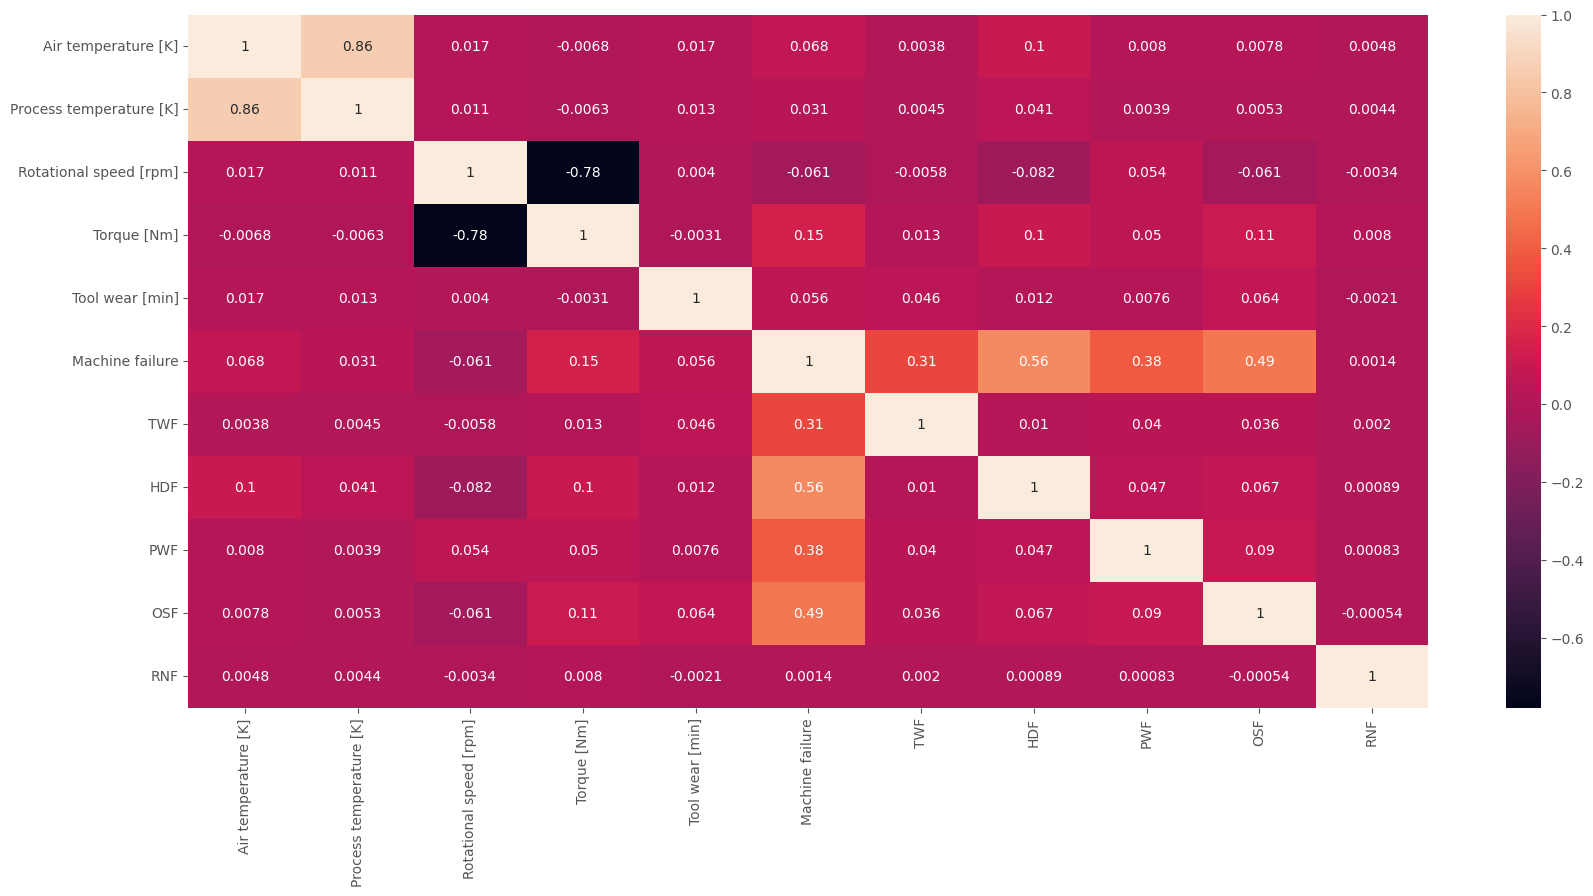

In [ ]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(),annot=True)

# Feature Importance & Feature Selection

In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
X = df.drop('Machine failure',axis=1)
y = df['Machine failure']

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(X,y,test_size=0.3,random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size=0.3,random_state=101)

In [ ]:
X_train.shape,X_val.shape,X_test.shape

((95500, 11), (28650, 11), (12279, 11))

In [ ]:
NumericFeatures =  [feature for feature in X_train.columns if str(X_train[feature].dtype).__contains__('int') or str(X_train[feature].dtype).__contains__('float')]
CategoricalFeatures =  [feature for feature in X_train.columns if str(X_train[feature].dtype).__contains__('object') or str(X_train[feature].dtype).__contains__('category')]

In [ ]:
print(f'Numeric Features : {NumericFeatures} \n Categorical Features : {CategoricalFeatures:}')

Numeric Features : ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'] 
 Categorical Features : ['Type']


### Mutual Information
Mutual information is a measure from information theory used to quantify the amount of information that one random variable contains about another random variable. It's a metric that quantifies the mutual dependence between two variables, describing how much knowing the value of one variable reduces uncertainty about the other variable.

### Key Points about Mutual Information:
- **Quantifying Relationship:** Mutual information measures the amount of information shared between two variables. It assesses how much knowledge about one variable can help predict the other.
- **Non-linear Relationships:** Unlike correlation, which measures linear relationships, mutual information captures both linear and non-linear associations between variables.
- **Entropy:** It's based on the concept of entropy, which measures uncertainty or randomness in a random variable. Higher mutual information indicates less uncertainty or more predictability between the variables.
- **Symmetric Measure:** Mutual information is symmetric, meaning MI(X, Y) = MI(Y, X). It quantifies the relationship between two variables irrespective of their positions as predictor or target.

### Formula for Mutual Information (for discrete variables):
In the context of mutual information, the mutual information score I(X; Y) between two random variables X (a feature) and Y (the target) can be expressed as:

I(X; Y) = Σx Σy P(x, y) * log(P(x, y) / (P(x) * P(y)))

Where:
- P(x, y) is the joint probability of X = x and Y = y.
- P(x) and P(y) are the marginal probabilities of X and Y, respectively.
- The sums go over all possible values of X and Y.

### Use Cases of Mutual Information:
- **Feature Selection:** In machine learning, mutual information is used for feature selection. It helps identify the most informative features for predicting a target variable by measuring the amount of information each feature provides about the target.
- **Dimensionality Reduction:** When dealing with high-dimensional datasets, mutual information can help identify and reduce redundant or irrelevant features.
- **Clustering and Classification:** It's utilized in tasks where understanding the relationship or dependency between variables is crucial, such as clustering or classification algorithms.

### Advantages of Mutual Information:
- Captures Non-linear Relationships: MI can detect both linear and non-linear relationships between variables, making it valuable when dealing with complex or non-linear associations.
- Model-Free Measure: It doesn't assume any particular model or distribution, allowing it to capture various types of dependencies between variables.
- Sensitive to Information Content: MI quantifies the amount of information shared between variables, providing insights into how much one variable helps predict another, irrespective of the relationship's form.
- Variable Selection: In feature selection tasks, MI can identify the most informative features for predicting a target variable, assisting in reducing the dimensionality of data without losing important information.
- Applicability: It's widely used in machine learning, pattern recognition, information theory, and bioinformatics, among other fields.

### Disadvantages of Mutual Information:
- Computational Complexity: Calculating MI can be computationally intensive, especially for high-dimensional data or large datasets, requiring careful considerations for efficient computation.
- Sensitivity to Binning/Discretization: MI calculations for continuous variables might involve discretizing or binning the data, and the choice of bins or discretization method can impact the results.
- Sample Size Sensitivity: MI estimates might be less reliable with small sample sizes, leading to potential instability in the results.
- No Causality Inference: MI measures association, not causation. It indicates the strength of the relationship but doesn't provide information about the direction or cause-effect relationship between variables.
- Dependency on Marginal Distributions: MI is influenced by the marginal distributions of variables, which might affect its ability to capture true dependencies.

### When to Use Mutual Information:
- Non-linear Relationships: Use MI when you suspect or want to capture non-linear associations between variables. Unlike correlation, which primarily measures linear relationships, MI is sensitive to non-linear dependencies.
- Variable Selection: In feature selection tasks for machine learning or modeling, MI is valuable for identifying the most informative features that contribute significantly to predicting a target variable.
- Information Content: When you're interested in understanding the amount of information shared between variables, especially in fields like information theory or data compression.
- Multivariate Analysis: In cases where you have multiple dependent variables and want to assess the joint information across these variables with multiple predictors.

### When Not to Use Mutual Information:
- Causality Inference: MI measures association, not causation. If you aim to establish cause-and-effect relationships between variables, MI alone cannot provide information on the direction of causality.
- Sample Size Constraints: With small sample sizes, MI estimates might be less stable and reliable. In such cases, caution is needed when interpreting the results.
- Computationally Intensive Tasks: Calculating MI can be computationally expensive, especially with large datasets or high-dimensional data. Other simpler measures might be more practical in such scenarios.
- Continuous Variables with Limited Data: MI can be sensitive to the choice of binning or discretization for continuous variables. With limited data or if the nature of continuous variables is crucial, other methods might be preferred.
- When Other Measures Suffice: If linear relationships are predominant and adequately captured by correlation, simpler measures might suffice without the need for the additional sensitivity to non-linear associations offered by MI.


In [ ]:
mi = mutual_info_classif(X_train[NumericFeatures],y_train)
sel_ = SelectKBest(mutual_info_classif,k=7).fit(X_train[NumericFeatures],y_train)
MutaulInformativeNumericFeatures = X_train[NumericFeatures].columns[sel_.get_support()]

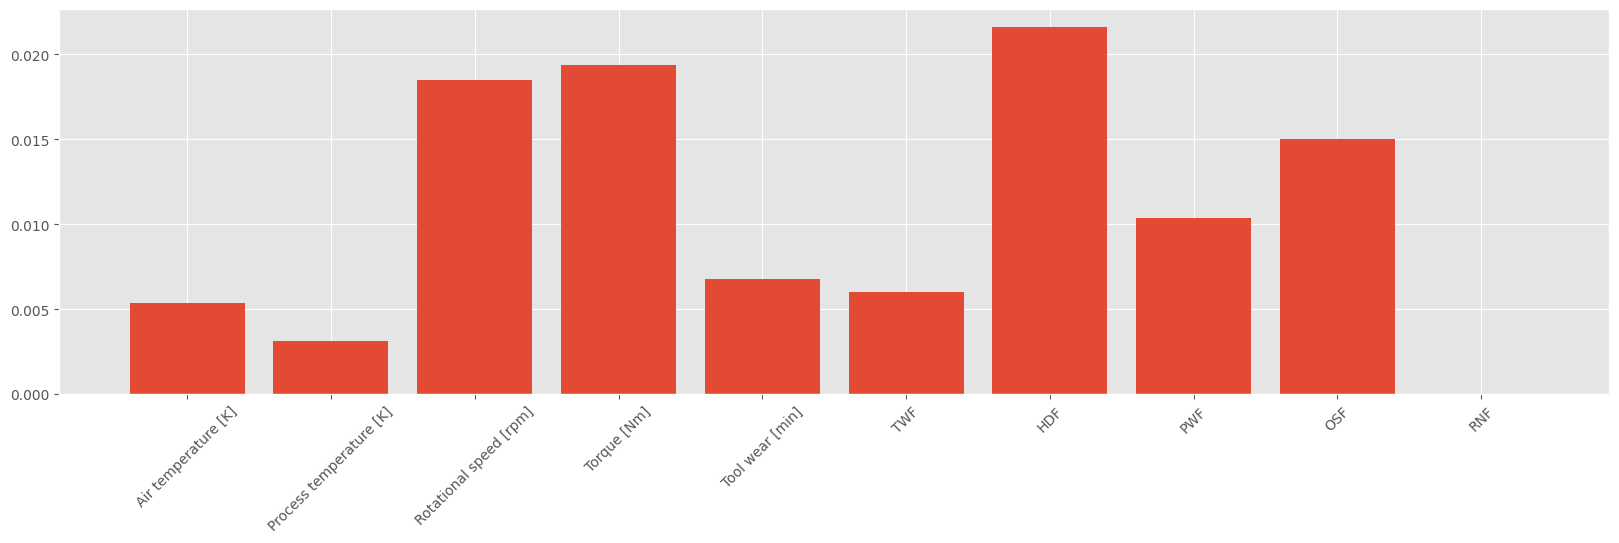

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))

ax.bar(NumericFeatures,mi)
ax.set_xticklabels(NumericFeatures, rotation=45)
plt.show()

The Chi-squared (χ²) test is a statistical method used to determine if there is a significant association between categorical variables. It assesses whether there is a relationship between the categorical variables in a contingency table.

### Key Points about the Chi-squared Test:

- **Type of Variables:** The Chi-squared test is used for categorical variables and is often applied when dealing with categorical data.
- **Null Hypothesis:** It operates under the assumption of the null hypothesis that there is no association between the categorical variables. The aim is to assess if the observed frequencies in the contingency table significantly differ from the expected frequencies under this assumption.
- **Contingency Tables:** The test involves organizing categorical data into a contingency table or cross-tabulation, which displays the frequency distribution of one variable against another.
- **Calculation:** It calculates the Chi-squared statistic based on the differences between observed and expected frequencies in each cell of the contingency table.
- **Degrees of Freedom:** The degrees of freedom in a Chi-squared test are calculated based on the number of rows and columns in the contingency table.
- **Interpretation:** The calculated Chi-squared statistic is compared to a critical value from the Chi-squared distribution with a specific degree of freedom and chosen significance level. If the calculated statistic exceeds the critical value, it suggests a significant association between the variables, rejecting the null hypothesis.

### Use Cases of the Chi-squared Test:

- Analysis of Survey Data: To test if responses to two different survey questions are related.
- Medical Studies: To examine the relationship between an outcome (e.g., disease presence) and potential risk factors (e.g., smoking, diet).
- Market Research: To analyze customer preferences for different products across various demographics.

### Assumptions and Limitations:

- **Categorical Variables:** The Chi-squared test is applicable only to categorical data and may not be suitable for continuous variables.
- **Independence Assumption:** It assumes that observations are independent. If data violates this assumption (e.g., clustered data), other tests might be more appropriate.
- **Sample Size:** Accuracy of the Chi-squared test depends on having sufficient sample sizes in each cell of the contingency table. Small cell frequencies might affect the test's reliability.
- **Validity of Results:** A significant result in the Chi-squared test does not imply causation; it only indicates an association between variables.

The Chi-squared test is widely used for its simplicity and effectiveness in assessing relationships between categorical variables, providing valuable insights into the associations present in categorical data.

### Chi-squared Formula:

For a contingency table with **r** rows and **c** columns:

\[ \chi^2 = \sum \frac{(O - E)^2}{E} \]

Where:

- \( \chi^2 \) is the Chi-squared statistic.
- \( O \) represents the observed frequency in a cell of the contingency table.
- \( E \) represents the expected frequency in the same cell under the assumption of independence.

The formula compares observed frequencies to expected frequencies, quantifying the discrepancy and suggesting a stronger association between the variables as the Chi-squared statistic increases.


Cramer's V is a measure of association used to quantify the strength of association between categorical variables in a contingency table. It's an extension of the Pearson chi-squared statistic and accounts for the table's dimensions. The value of Cramer's V ranges between 0 and 1.

### Interpretation of Cramer's V:
- **Close to 0:** Indicates a weak association between variables.
- **Close to 1:** Suggests a strong association between variables.

However, the interpretation of the value can vary based on the field and context of the study. Here's a more detailed interpretation guideline:
- **0:** No association between variables.
- **0.1-0.2:** Weak association.
- **0.3-0.4:** Moderate association.
- **0.5 and above:** Strong association.

### Key Considerations:
- **Size of Contingency Table:** Larger tables tend to produce smaller Cramer's V values, even when the association might be strong. For larger tables, even a strong association might result in a relatively small value.
- **Number of Categories:** Cramer's V values can be influenced by the number of categories in variables. With a large number of categories, even a strong association might yield a lower Cramer's V.
- **Assessing Strength:** Always consider the context and domain-specific knowledge when interpreting Cramer's V. A 'strong' association might have different implications in various fields.

### Example:
In a study examining the relationship between gender and favorite ice cream flavor:
- If Cramer's V is 0.1, it suggests a weak association between gender and ice cream flavor preference.
- If Cramer's V is 0.6, it indicates a strong association, implying that gender might strongly influence ice cream flavor preference.

### Formula for Cramer's V:

\[ V = \sqrt{\frac{\chi^2}{n \times \text{min}(r-1, c-1)}} \]

Where:
- \( V \) is Cramer's V.
- \( \chi^2 \) is the chi-squared statistic.
- \( n \) is the total sample size.
- \( r \) is the number of rows in the contingency table.
- \( c \) is the number of columns in the contingency table.

This formula normalizes the chi-squared statistic by considering the size of the contingency table to obtain the association measure.

Interpreting Cramer's V involves understanding the strength of association between categorical variables. It serves as a valuable metric to quantify and compare associations between different categorical variable pairs.


In [ ]:
contingency_table = pd.crosstab(y_train,X_train[CategoricalFeatures[0]])

chi_stats, pvalue = chi2_contingency(contingency_table)[0],chi2_contingency(contingency_table)[1]
num_obs = contingency_table.sum().sum()
cramers_v = np.sqrt(chi_stats / (num_obs * (min(contingency_table.shape) - 1)))

In [ ]:
cramers_v,pvalue

(0.00940603426542659, 0.014631058740986053)

- **Cramer's V (0.0094):** Indicates a very weak association between the categorical variables.
- **Chi-squared Test p-value (0.0146):** The p-value suggests that the observed association might not be due to random chance, but it's not significantly strong.


In [ ]:
SelectedFeature = list(MutaulInformativeNumericFeatures) +CategoricalFeatures

In [ ]:
new_df = pd.concat([df[SelectedFeature],y],axis=1)

# EDA

## Univariante Analysis

In [ ]:
def ShowCategoricalFeatures(data,feature):
  fig,ax = plt.subplots(1,2,figsize=(20,4))

  labels = new_df[feature].value_counts().index
  values = new_df[feature].value_counts().values

  ax[0].set_title(f'Barplot of {feature}')
  ax[0].bar(labels,values)

  ax[1].set_title(f'Ratio of {feature}')
  ax[1].pie(x=values,labels=labels,startangle=45,autopct='%.0f%%')

  plt.show()

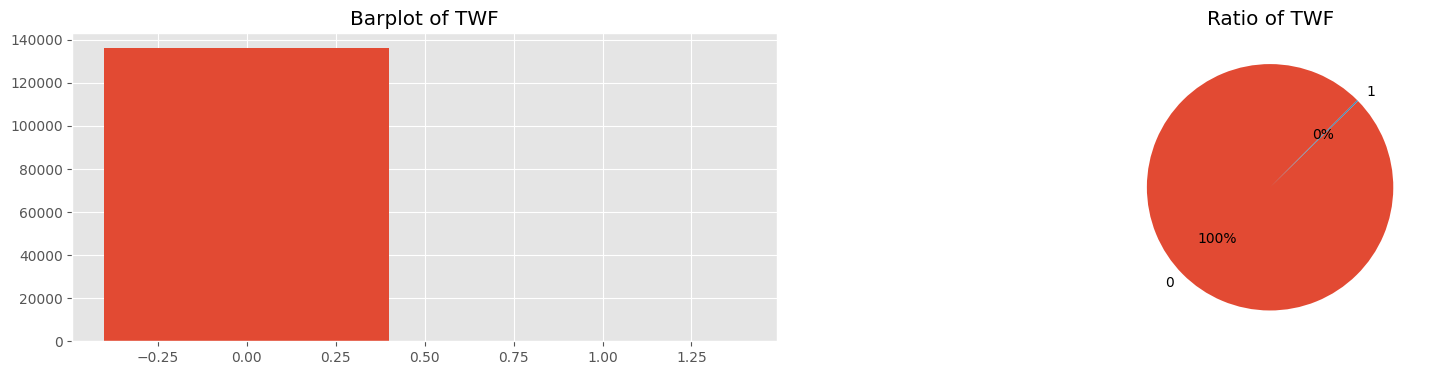

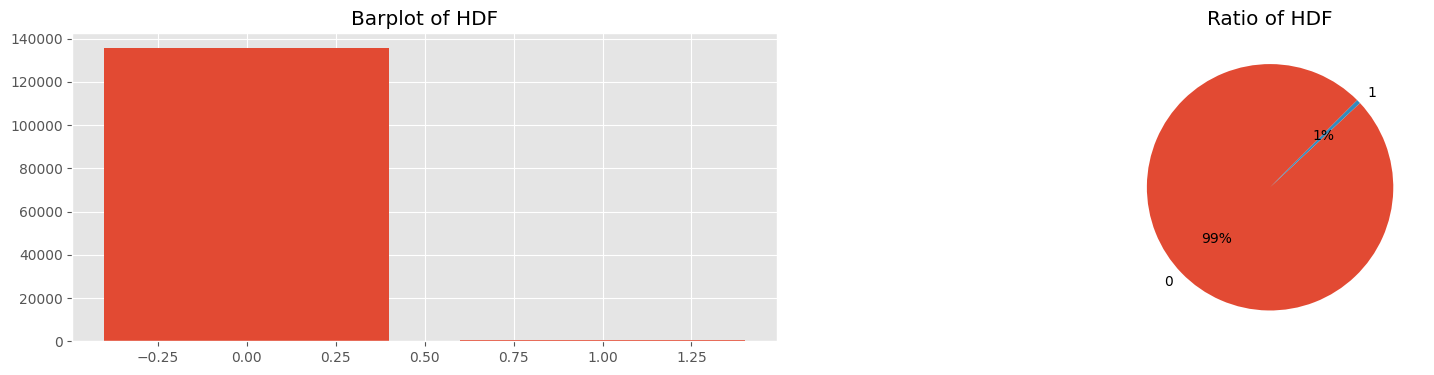

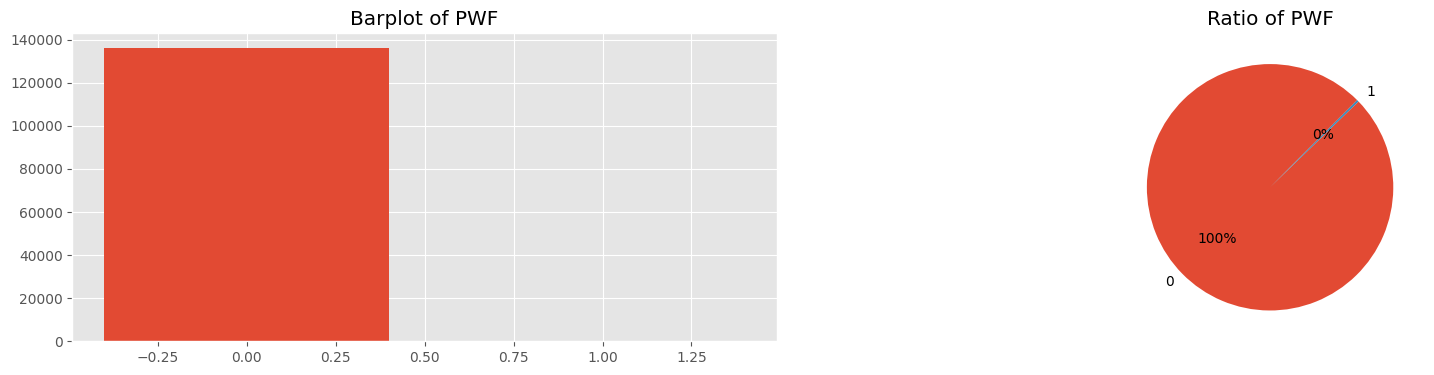

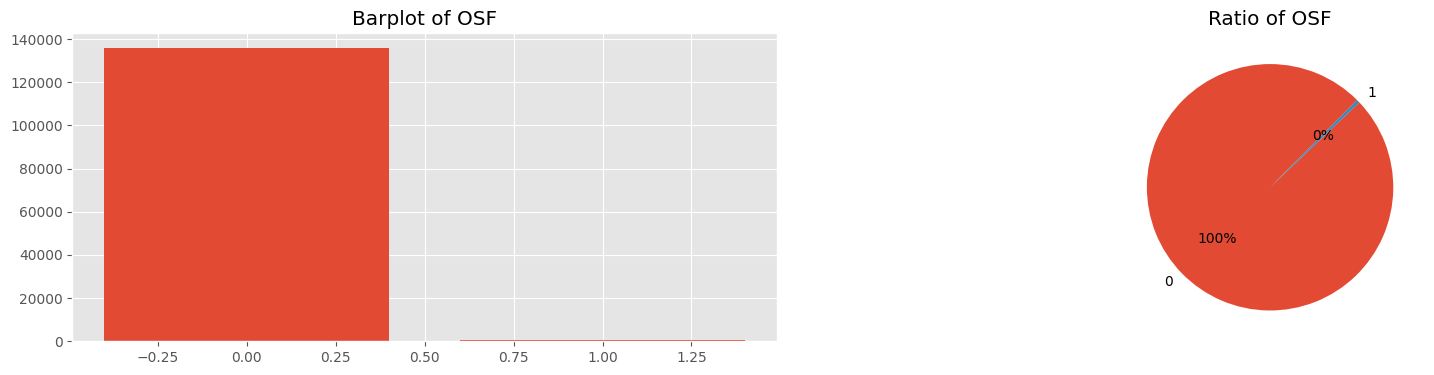

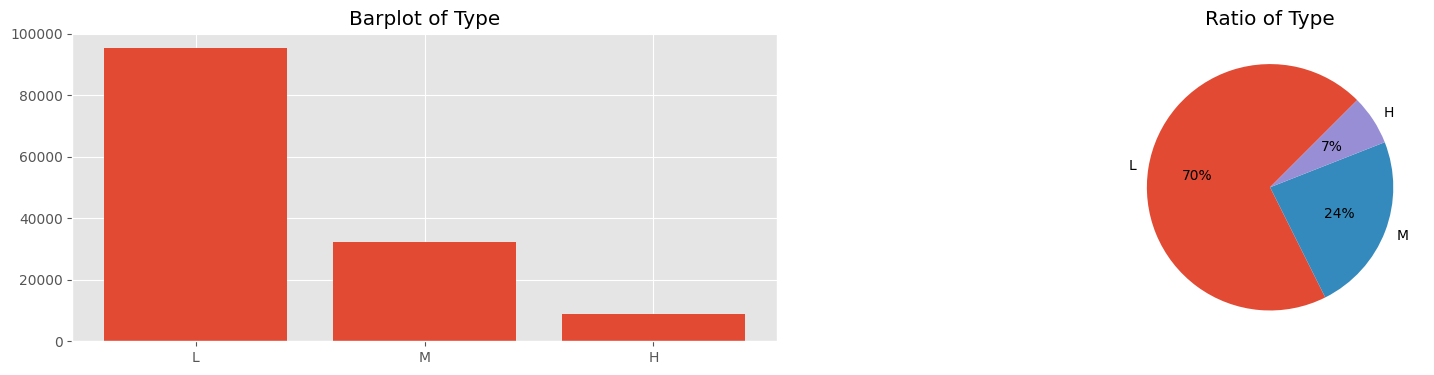

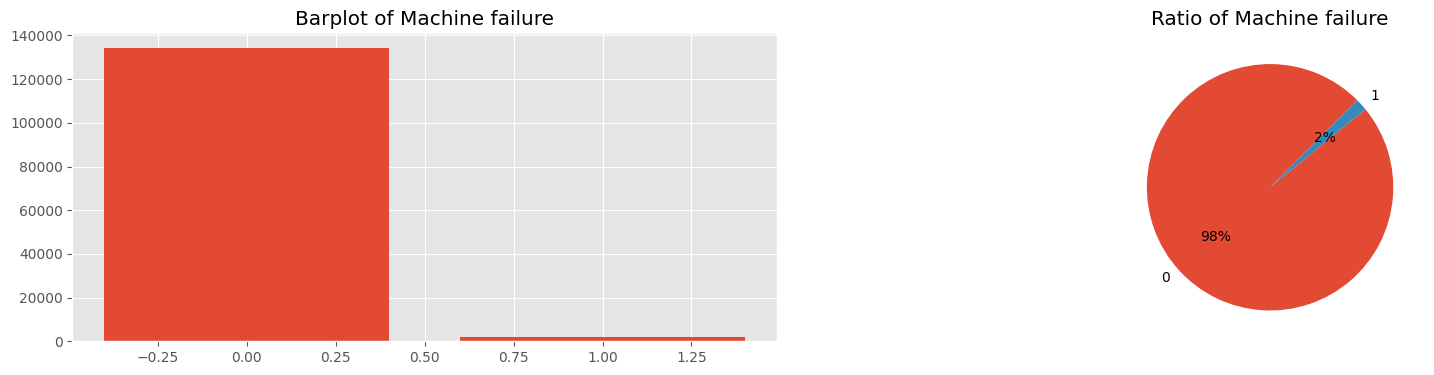

In [ ]:
for feature in new_df.columns[3:]:
  ShowCategoricalFeatures(new_df,feature)

In [ ]:
def ShowNumericalFeature(data,feature):
  fig,ax = plt.subplots(1,3,figsize=(20,4))

  ax[0].set_title(f'Distribution of {feature}')
  sns.distplot(data[feature],ax=ax[0])

  ax[1].set_title('Boxplot of feature')
  sns.boxplot(data[feature],ax=ax[1])

  stats.probplot(data[feature],plot=ax[2])

  plt.show()

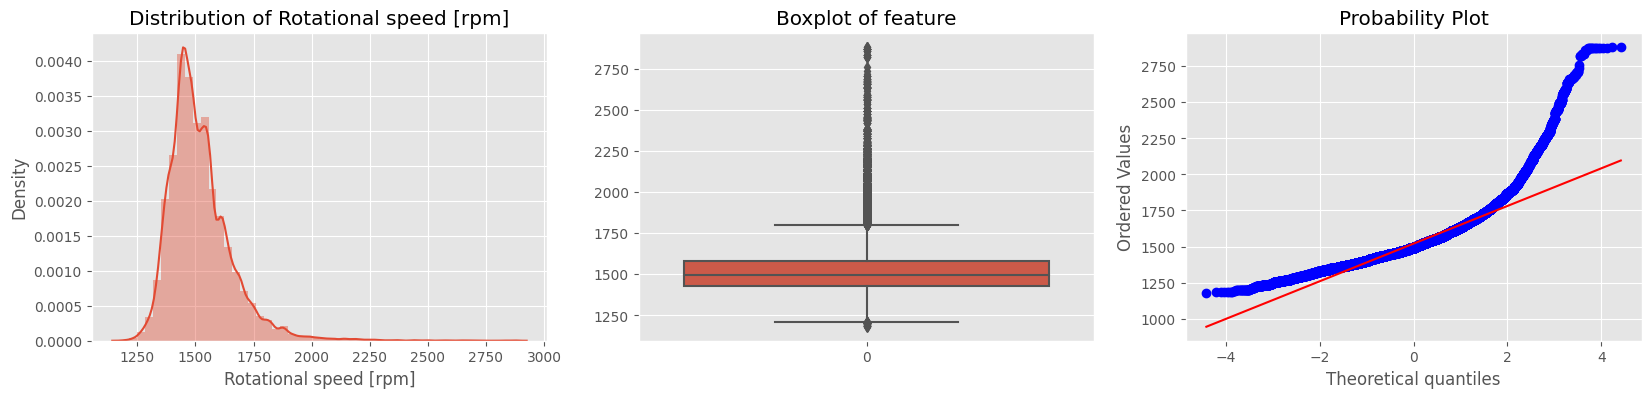

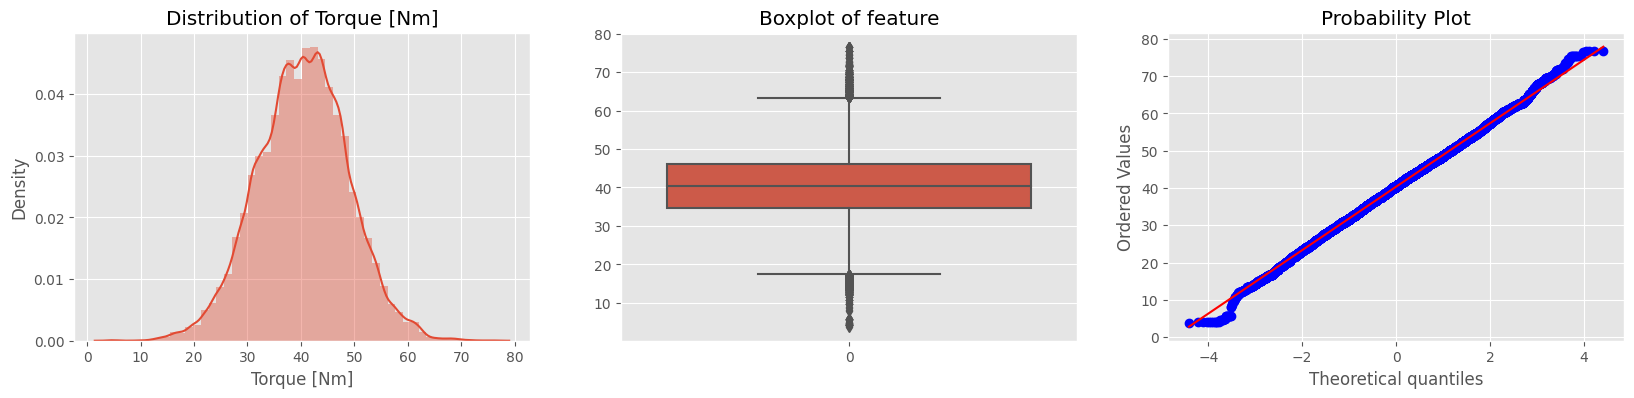

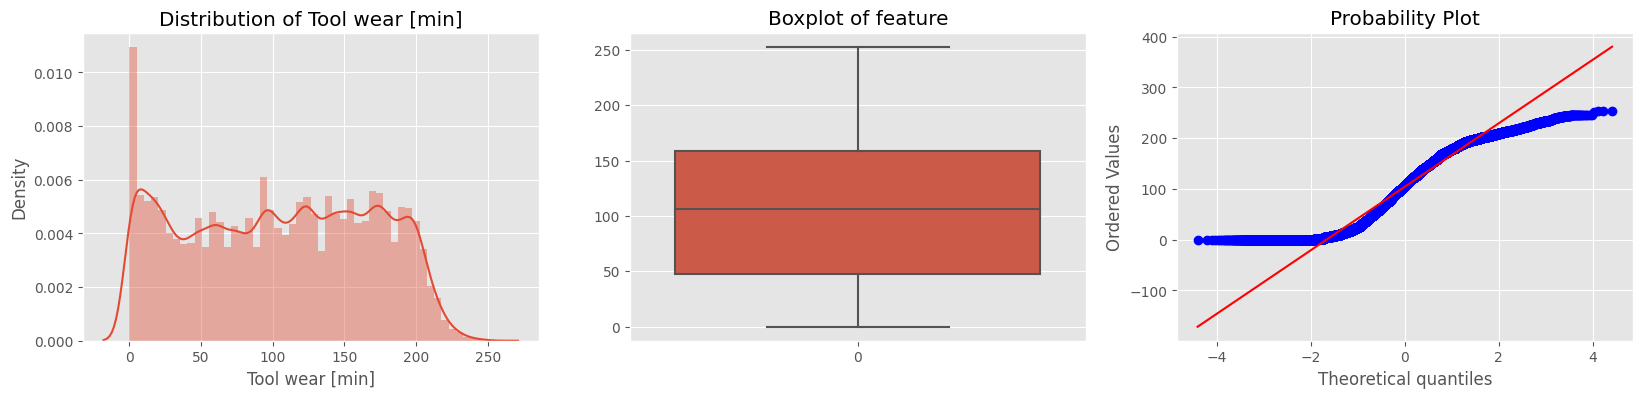

In [ ]:
for feature in new_df.columns[:3]:
  ShowNumericalFeature(new_df,feature)

## Observations
  - Target column shows imbalance qualities
  - Need more investigation on categorical features
  - Numerical feature have extreme values/ Outlier
  - Numerical feature have Skewed Distributions

## Multivariant Analysis
  - First We trying to know what is realtion between Numerical and Target columns.

In [ ]:
new_df.columns

Index(['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'Type', 'Machine failure'],
      dtype='object')

In [ ]:
def showNumericalFeatureWithTarget(target,feature,data):
  fig,ax = plt.subplots(2,2,figsize=(20,7))
  fig.suptitle(f'{feature} vs {target}',fontsize=12)
  ax[0][0].set_title(f'Distribution of {feature} based on {target}',fontsize=8)
  sns.distplot(data.loc[data[target]==0][feature],ax=ax[0][0],label=0)
  sns.distplot(data.loc[data[target]==1][feature],ax=ax[0][0],label=1)
  ax[0][0].legend()

  ax[0][1].set_title(f'Boxplot of {feature} based on {target}',fontsize=8)
  sns.boxplot(x=target, y=feature, data=data,ax=ax[0][1])


  sns.violinplot(x=target, y=feature, data=data,ax=ax[1][0])

  sns.barplot(x=target, y=feature, data=data,ax=ax[1][1])
  plt.show()
  print()
  print()

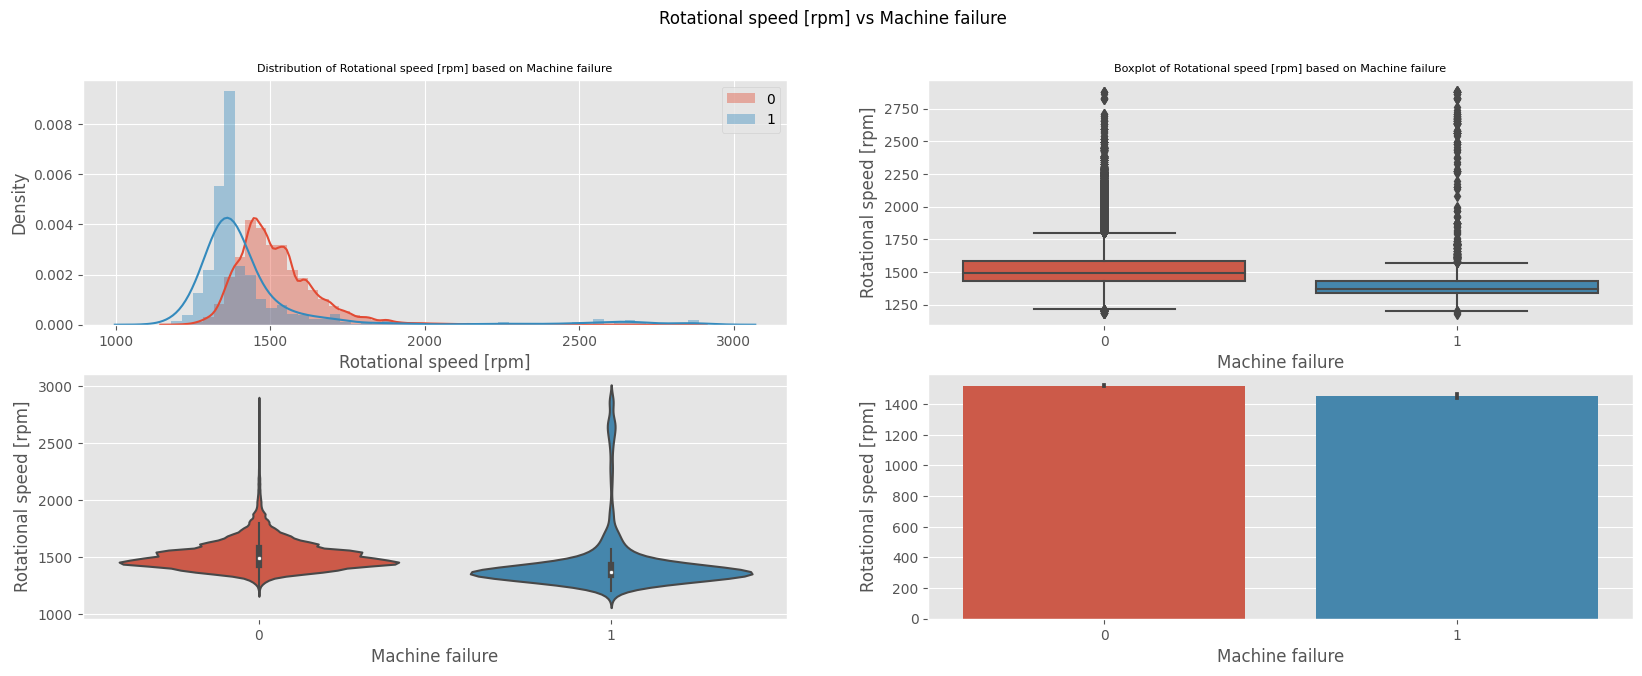

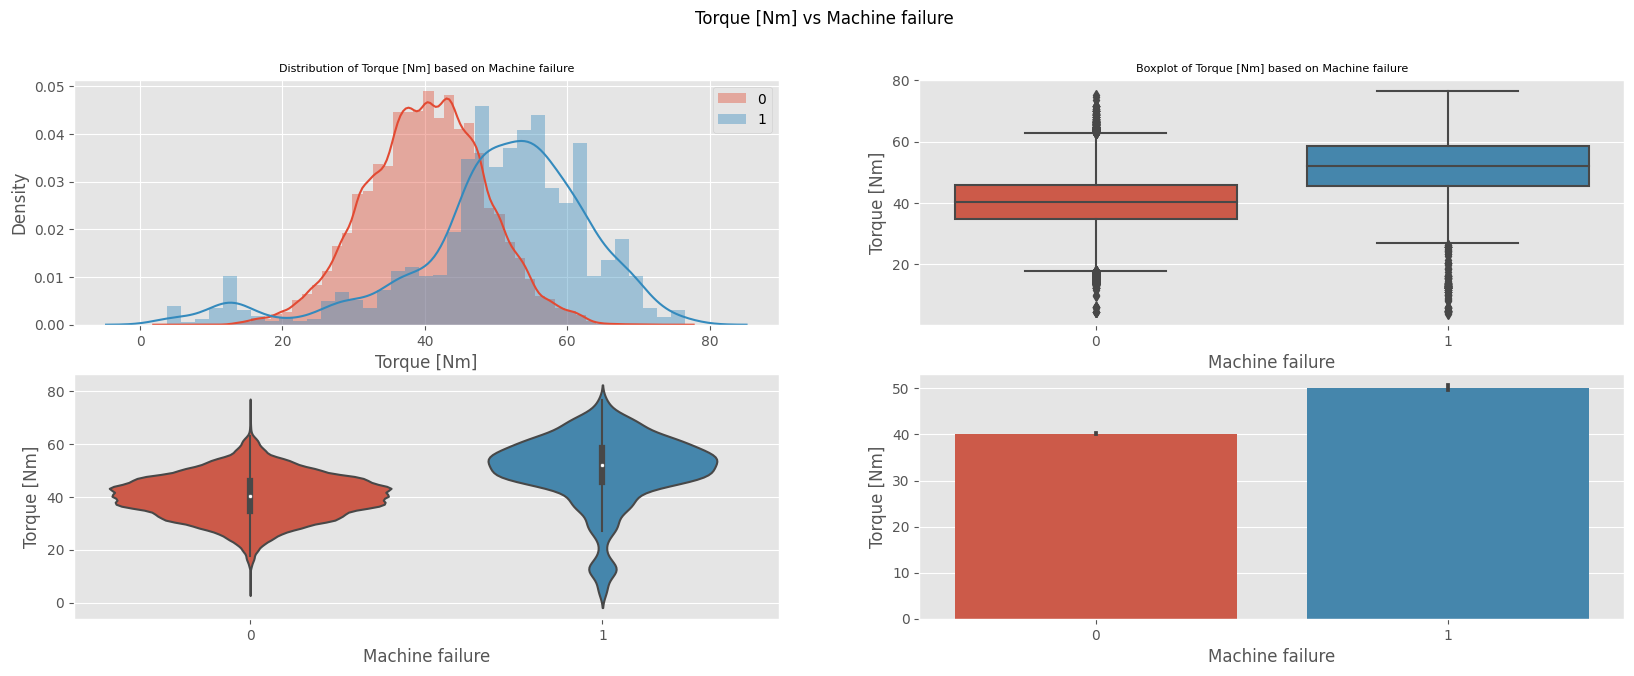

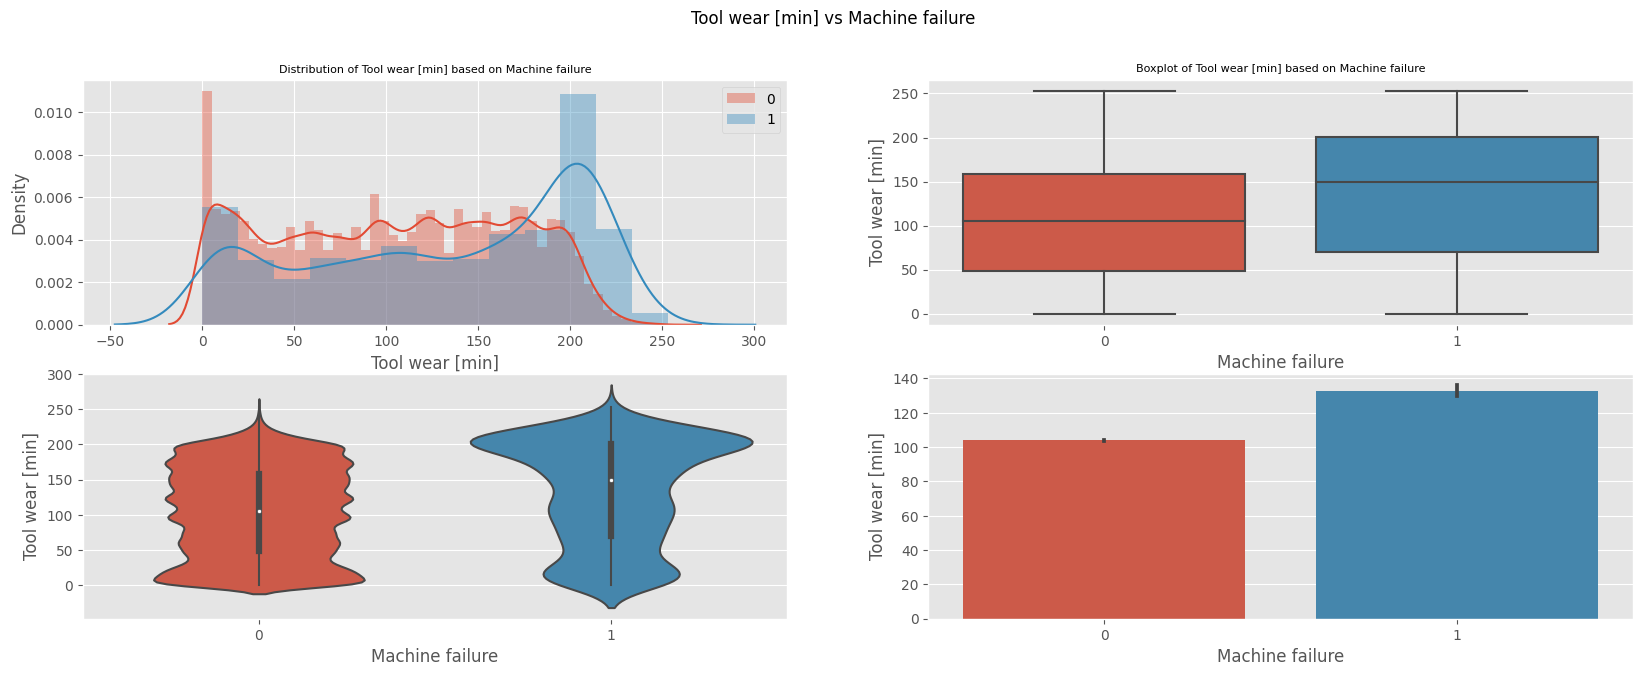

In [ ]:
for feature in new_df.columns[:3]:
  showNumericalFeatureWithTarget('Machine failure',feature,new_df)

## Observations
  - If we drop the outliers we loss 17% of the observation that shows have machine failure behavior
  - The problem is we can't remove the outliers we have to go for models that are robust to outliers and create decision boundries.
  - Why ? Due to data lose and our focus is on machine failure that means the problem statment on which we are working on we have to focus on Machine failure (Yes or 1) which is minority class
  - Mean the observation are imbalanced.

## Looking into Extreme Values (Outliers)

In [ ]:
new_df.columns

Index(['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'Type', 'Machine failure'],
      dtype='object')

In [ ]:
new_df.shape

(136429, 9)

In [ ]:
def getUpperLowerBound(feature,data):
  Q3 = data[feature].quantile(0.75)
  Q1 = data[feature].quantile(0.25)
  IQR = Q3 - Q1
  upperbound =  Q3 + (1.5 * IQR)
  lowerbound =  Q1 - (1.5 * IQR)
  return upperbound,lowerbound,IQR

In [ ]:
upperbound,lowerbound,IQR = getUpperLowerBound('Rotational speed [rpm]',new_df)

In [ ]:
Rotational_speed_index = new_df.query("`Rotational speed [rpm]` < @lowerbound or `Rotational speed [rpm]` > @upperbound").index

In [ ]:
upperbound,lowerbound,IQR = getUpperLowerBound('Torque [Nm]',new_df)

In [ ]:
Torque_index = new_df.query("`Torque [Nm]` < @lowerbound or `Torque [Nm]` > @upperbound").index

In [ ]:
drop_indexs = list(set(Rotational_speed_index).union(set(Torque_index)))

In [ ]:
len(drop_indexs) / new_df.shape[0] * 100

4.16187174281128

In [ ]:
approch1_df = new_df.drop(drop_indexs,axis=0)

In [ ]:
approch1_df.isnull().sum()

Rotational speed [rpm]    0
Torque [Nm]               0
Tool wear [min]           0
TWF                       0
HDF                       0
PWF                       0
OSF                       0
Type                      0
Machine failure           0
dtype: int64

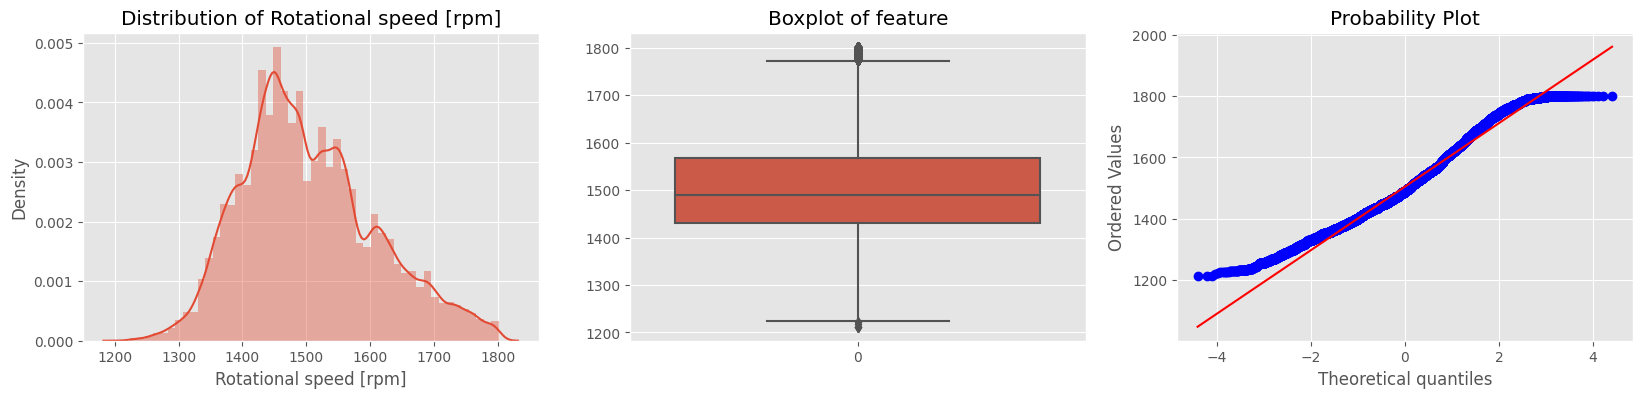

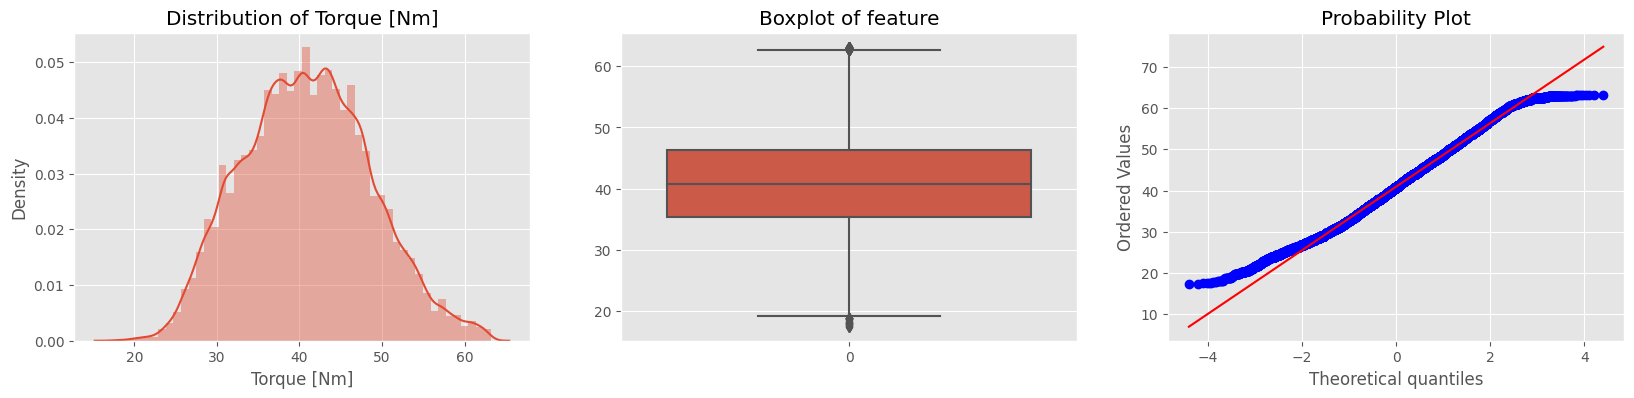

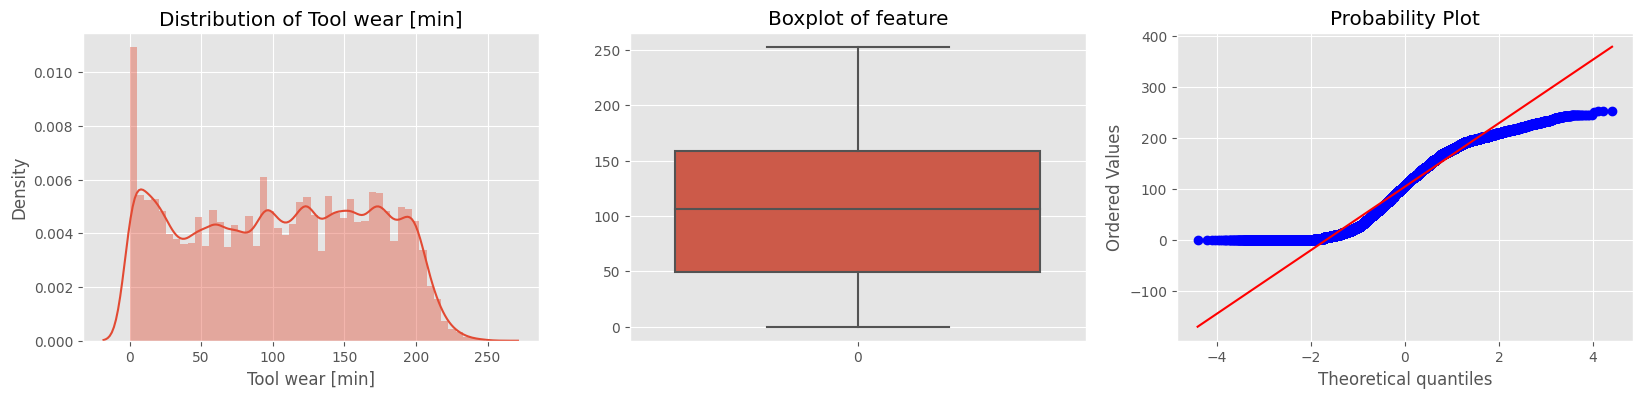

In [ ]:
for feature in approch1_df.columns[:3]:
  ShowNumericalFeature(approch1_df,feature)

In [ ]:
approch1_df.columns

Index(['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'Type', 'Machine failure'],
      dtype='object')

In [ ]:
approch1_df_final = pd.concat([approch1_df,pd.get_dummies(approch1_df['Type'], prefix='Type',drop_first=True)],axis=1).drop('Type',axis=1)

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(approch1_df_final.drop('Machine failure',axis=1),approch1_df_final['Machine failure'],test_size=0.3,random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size=0.3,random_state=101)

In [ ]:
X_train.shape,X_val.shape,X_test.shape

((91525, 9), (27458, 9), (11768, 9))

In [ ]:
models = [('RandomForestClassifier',RandomForestClassifier()),('SVC',SVC()),('LogisticRegression',LogisticRegression())]

In [ ]:
approch1_df_final.isnull().sum()

Rotational speed [rpm]    0
Torque [Nm]               0
Tool wear [min]           0
TWF                       0
HDF                       0
PWF                       0
OSF                       0
Machine failure           0
Type_L                    0
Type_M                    0
dtype: int64

In [ ]:
results = {
        'Model_Name':list(),
        'train_roc_auc_score':list(),
        'val_roc_auc_score':list(),
        'train_f1_score':list(),
        'val_f1_score':list(),
        'train_balanced_accuracy_score':list(),
        'val_balanced_accuracy_score':list()
    }
for name,model in models:
  if name == 'LogisticRegression' or name == 'SVC':
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_transformed = scaler.transform(X_train)
    X_val_transformed = scaler.transform(X_val)
    model.fit(X_train_transformed,y_train)

    X_train_predictions = model.predict(X_train_transformed)
    X_val_predictions = model.predict(X_val_transformed)

    results['Model_Name'].append(name)
    results['train_roc_auc_score'].append(roc_auc_score(y_train,X_train_predictions))
    results['val_roc_auc_score'].append(roc_auc_score(y_val,X_val_predictions))
    results['train_f1_score'].append(f1_score(y_train,X_train_predictions))
    results['val_f1_score'].append(f1_score(y_val,X_val_predictions))
    results['train_balanced_accuracy_score'].append(balanced_accuracy_score(y_train,X_train_predictions))
    results['val_balanced_accuracy_score'].append(balanced_accuracy_score(y_val,X_val_predictions))
  else:
    model.fit(X_train,y_train)

    X_train_predictions = model.predict(X_train)
    X_val_predictions = model.predict(X_val)

    results['Model_Name'].append(name)
    results['train_roc_auc_score'].append(roc_auc_score(y_train,X_train_predictions))
    results['val_roc_auc_score'].append(roc_auc_score(y_val,X_val_predictions))
    results['train_f1_score'].append(f1_score(y_train,X_train_predictions))
    results['val_f1_score'].append(f1_score(y_val,X_val_predictions))
    results['train_balanced_accuracy_score'].append(balanced_accuracy_score(y_train,X_train_predictions))
    results['val_balanced_accuracy_score'].append(balanced_accuracy_score(y_val,X_val_predictions))

In [ ]:
results = pd.DataFrame(results)

In [ ]:
results

,Model_Name,train_roc_auc_score,val_roc_auc_score,train_f1_score,val_f1_score,train_balanced_accuracy_score,val_balanced_accuracy_score
0,RandomForestClassifier,0.993011,0.872239,0.991347,0.844776,0.993011,0.872239
1,SVC,0.879049,0.872331,0.858867,0.851128,0.879049,0.872331
2,LogisticRegression,0.879049,0.872331,0.858867,0.851128,0.879049,0.872331


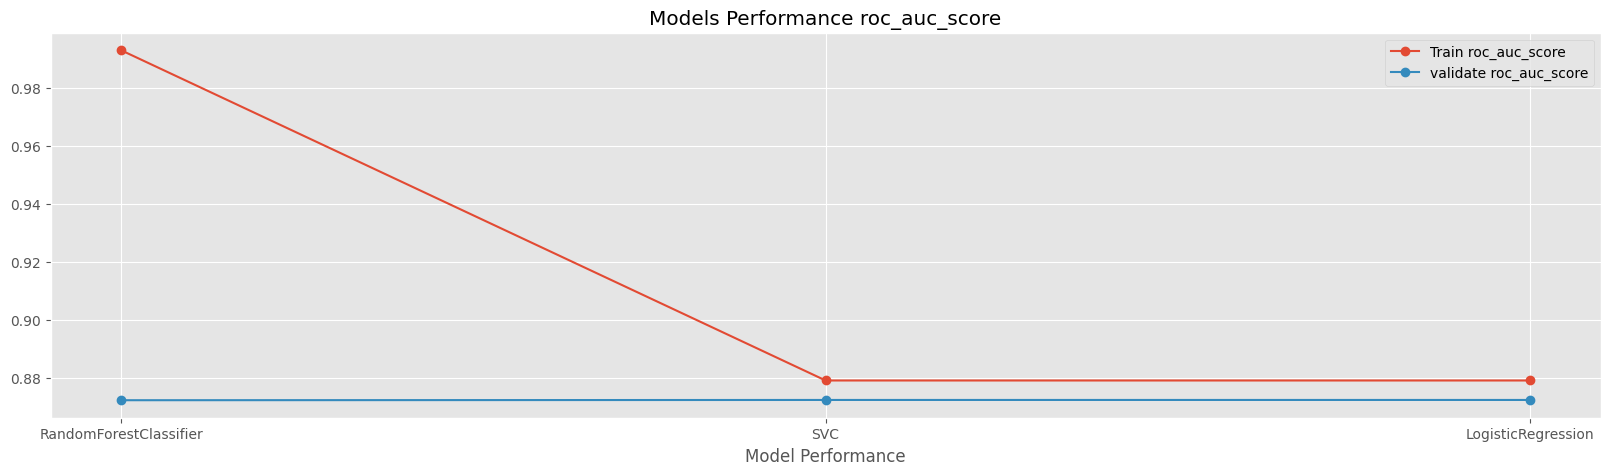

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))
ax.set_title('Models Performance roc_auc_score')
ax.plot(results['Model_Name'],results['train_roc_auc_score'],label='Train roc_auc_score', marker='o')
ax.plot(results['Model_Name'],results['val_roc_auc_score'],label='validate roc_auc_score', marker='o')
ax.set_xlabel('Models')
ax.set_xlabel('Model Performance')
ax.legend()
plt.show()

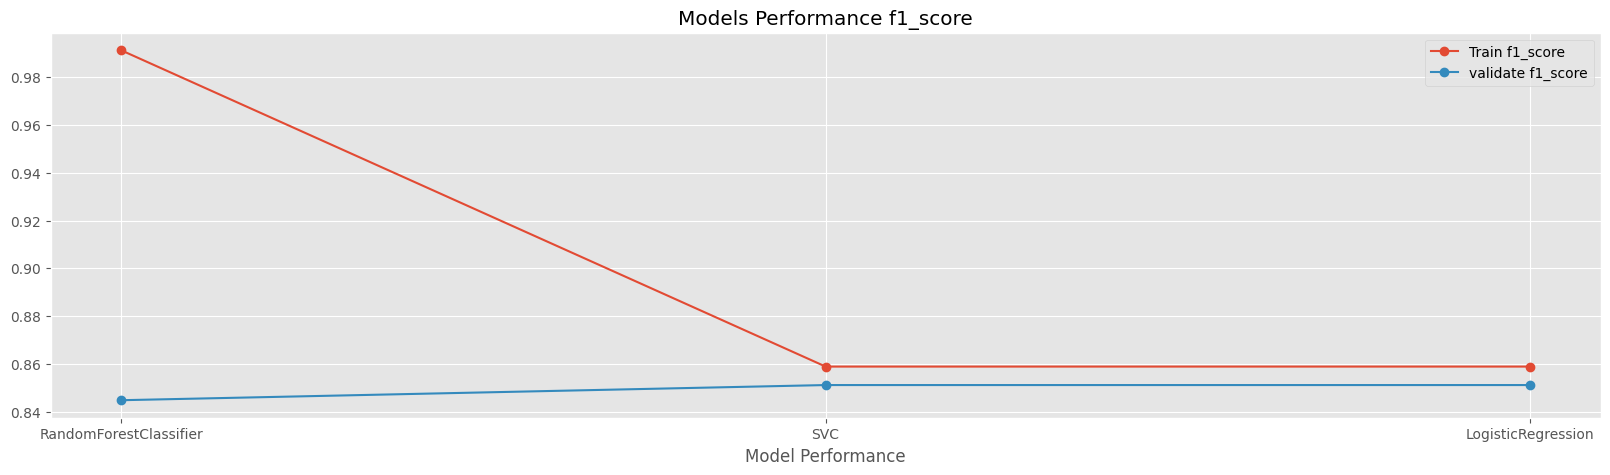

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))
ax.set_title('Models Performance f1_score')
ax.plot(results['Model_Name'],results['train_f1_score'],label='Train f1_score', marker='o')
ax.plot(results['Model_Name'],results['val_f1_score'],label='validate f1_score', marker='o')
ax.set_xlabel('Models')
ax.set_xlabel('Model Performance')
ax.legend()
plt.show()

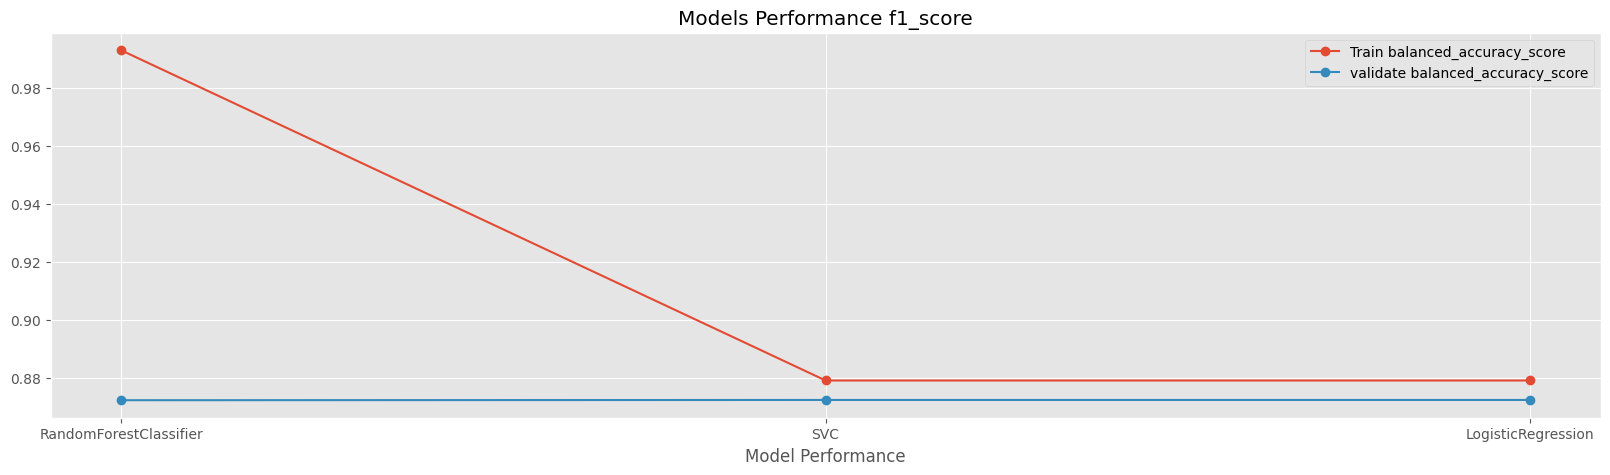

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))
ax.set_title('Models Performance f1_score')
ax.plot(results['Model_Name'],results['train_balanced_accuracy_score'],label='Train balanced_accuracy_score', marker='o')
ax.plot(results['Model_Name'],results['val_balanced_accuracy_score'],label='validate balanced_accuracy_score', marker='o')
ax.set_xlabel('Models')
ax.set_xlabel('Model Performance')
ax.legend()
plt.show()

In [ ]:
approch2_df_final = pd.concat([new_df,pd.get_dummies(new_df['Type'], prefix='Type',drop_first=True)],axis=1).drop('Type',axis=1)

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(approch2_df_final.drop('Machine failure',axis=1),approch2_df_final['Machine failure'],test_size=0.3,random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size=0.3,random_state=101)

In [ ]:
with_outlier_results = {
        'Model_Name':list(),
        'train_roc_auc_score':list(),
        'val_roc_auc_score':list(),
        'train_f1_score':list(),
        'val_f1_score':list(),
        'train_balanced_accuracy_score':list(),
        'val_balanced_accuracy_score':list()
    }
for name,model in models:
  if name == 'LogisticRegression' or name == 'SVC':
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_transformed = scaler.transform(X_train)
    X_val_transformed = scaler.transform(X_val)
    model.fit(X_train_transformed,y_train)

    X_train_predictions = model.predict(X_train_transformed)
    X_val_predictions = model.predict(X_val_transformed)

    with_outlier_results['Model_Name'].append(name)
    with_outlier_results['train_roc_auc_score'].append(roc_auc_score(y_train,X_train_predictions))
    with_outlier_results['val_roc_auc_score'].append(roc_auc_score(y_val,X_val_predictions))
    with_outlier_results['train_f1_score'].append(f1_score(y_train,X_train_predictions))
    with_outlier_results['val_f1_score'].append(f1_score(y_val,X_val_predictions))
    with_outlier_results['train_balanced_accuracy_score'].append(balanced_accuracy_score(y_train,X_train_predictions))
    with_outlier_results['val_balanced_accuracy_score'].append(balanced_accuracy_score(y_val,X_val_predictions))
  else:
    model.fit(X_train,y_train)

    X_train_predictions = model.predict(X_train)
    X_val_predictions = model.predict(X_val)

    with_outlier_results['Model_Name'].append(name)
    with_outlier_results['train_roc_auc_score'].append(roc_auc_score(y_train,X_train_predictions))
    with_outlier_results['val_roc_auc_score'].append(roc_auc_score(y_val,X_val_predictions))
    with_outlier_results['train_f1_score'].append(f1_score(y_train,X_train_predictions))
    with_outlier_results['val_f1_score'].append(f1_score(y_val,X_val_predictions))
    with_outlier_results['train_balanced_accuracy_score'].append(balanced_accuracy_score(y_train,X_train_predictions))
    with_outlier_results['val_balanced_accuracy_score'].append(balanced_accuracy_score(y_val,X_val_predictions))

In [ ]:
with_outlier_results = pd.DataFrame(with_outlier_results)

In [ ]:
with_outlier_results

,Model_Name,train_roc_auc_score,val_roc_auc_score,train_f1_score,val_f1_score,train_balanced_accuracy_score,val_balanced_accuracy_score
0,RandomForestClassifier,0.991871,0.890719,0.989488,0.862428,0.991871,0.890719
1,SVC,0.880584,0.889919,0.860518,0.875294,0.880584,0.889919
2,LogisticRegression,0.880584,0.889919,0.860518,0.875294,0.880584,0.889919


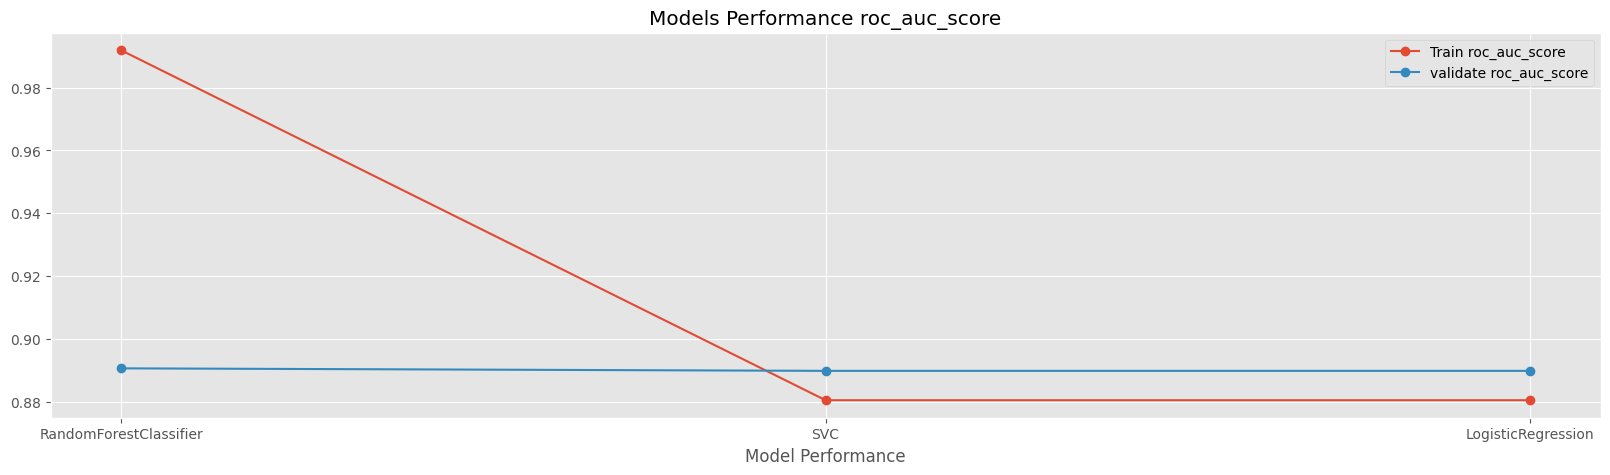

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))
ax.set_title('Models Performance roc_auc_score')
ax.plot(with_outlier_results['Model_Name'],with_outlier_results['train_roc_auc_score'],label='Train roc_auc_score', marker='o')
ax.plot(with_outlier_results['Model_Name'],with_outlier_results['val_roc_auc_score'],label='validate roc_auc_score', marker='o')
ax.set_xlabel('Models')
ax.set_xlabel('Model Performance')
ax.legend()
plt.show()

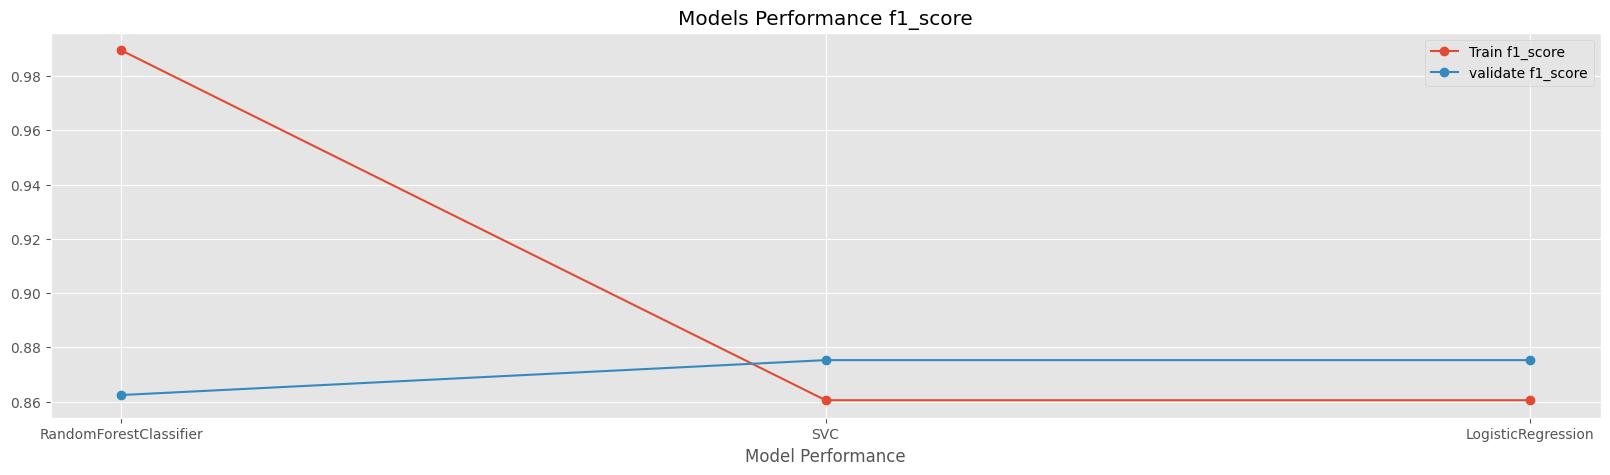

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))
ax.set_title('Models Performance f1_score')
ax.plot(with_outlier_results['Model_Name'],with_outlier_results['train_f1_score'],label='Train f1_score', marker='o')
ax.plot(with_outlier_results['Model_Name'],with_outlier_results['val_f1_score'],label='validate f1_score', marker='o')
ax.set_xlabel('Models')
ax.set_xlabel('Model Performance')
ax.legend()
plt.show()

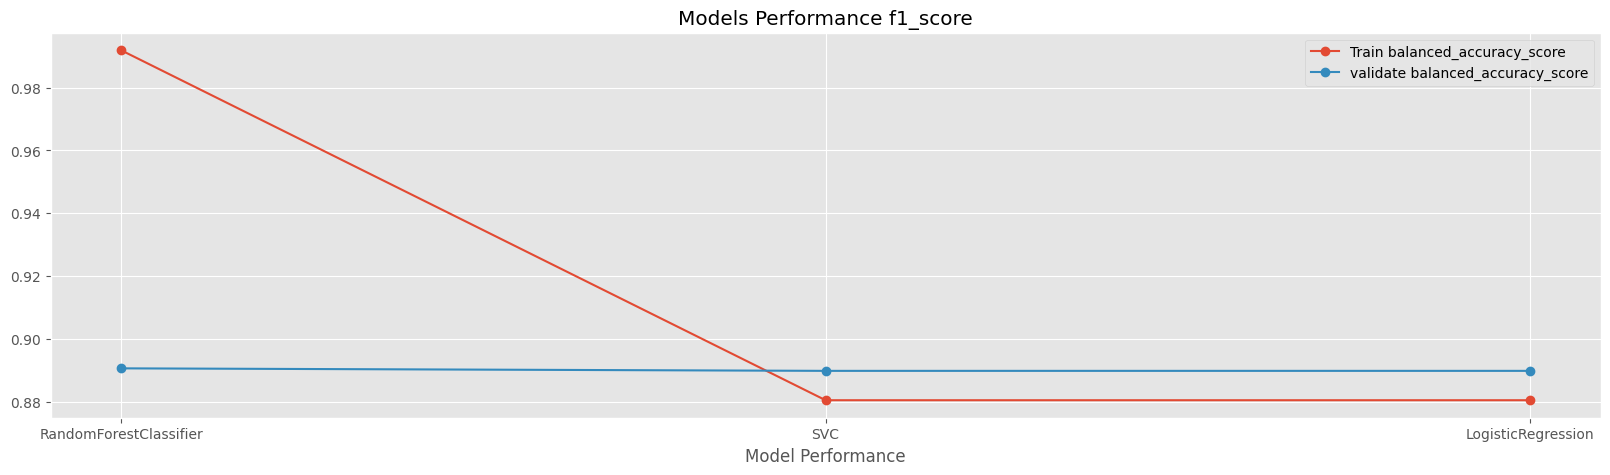

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))
ax.set_title('Models Performance f1_score')
ax.plot(with_outlier_results['Model_Name'],with_outlier_results['train_balanced_accuracy_score'],label='Train balanced_accuracy_score', marker='o')
ax.plot(with_outlier_results['Model_Name'],with_outlier_results['val_balanced_accuracy_score'],label='validate balanced_accuracy_score', marker='o')
ax.set_xlabel('Models')
ax.set_xlabel('Model Performance')
ax.legend()
plt.show()